In [1]:
from Coulomb import *
from plotting import *

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [3]:
help(Coulomb.__init__)

Help on function __init__ in module Coulomb:

__init__(self, qa, qb, ma, mb, temp_b, n, slow=True, para=True, perp=True)
    qa, ma: charge and mass of test particle [kg, Coulomb]
    qb, mb: charge and mass of background particle [kg, Coulomb]
    temp_b: temperature of background species [eV]
    n:      density of background species [m^-3]



In [4]:
vHist2_EM = test.beam_EM(17000, 100, 1E-2, 0.2)
speed2_EM = np.linalg.norm(vHist2_EM, axis = -1)
vHist4_EM = test.beam_EM(17000, 100, 1E-4, 0.2)
speed4_EM = np.linalg.norm(vHist4_EM, axis = -1)

In [5]:
vHist2 = test.beam_MEM(17000, 100, 1E-2, 0.2)
speed2 = np.linalg.norm(vHist2, axis = -1)
vHist4 = test.beam_MEM(17000, 100, 1E-4, 0.2)
speed4 = np.linalg.norm(vHist4, axis = -1)

In [6]:
help(formatAndSave)

Help on function formatAndSave in module plotting:

formatAndSave(fig, ax, lines, xlabel, ylabel, legends=None, title=None, fontsize=14, filename=None)
    formats the current figure, and save to file if filename is provided.



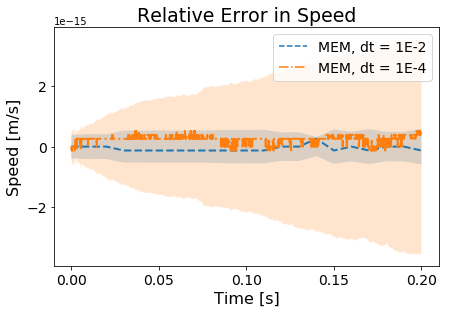

In [7]:
fig, ax = plt.subplots()
lines = []
# lines = aveAndSTD(ax, speed2_EM, 0.2, label = 'EM, dt = 1E-2')
# lines += aveAndSTD(ax, speed4_EM, 0.2, label = 'EM, dt = 1E-4')
lines += aveAndSTD(ax, speed2, 0.2, markers = '--', label = 'MEM, dt = 1E-2')
lines += aveAndSTD(ax, speed4, 0.2, markers = '-.', label = 'MEM, dt = 1E-4')
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
# ax.linewidth(2)
formatAndSave(fig, ax, lines, 'Time [s]', 'Speed [m/s]', title = "Relative Error in Speed", fontsize = 16, filename = "MEM_rel.pdf")


No handles with labels found to put in legend.


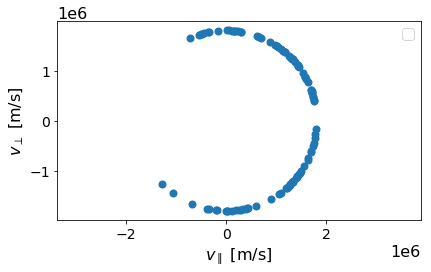

In [8]:
tslice = 2001
vx4 = vHist4[tslice, :, 0];
vy4 = vHist4[tslice, :, 1];
vz4 = vHist4[tslice, :, 2];
vperp4 = np.sqrt(vy4**2 + vz4**2) * np.sign(vz4);
# vexp4 = np.sqrt(vHist4[0, :, 0]**2 - vx4**2)
fig, ax = plt.subplots()
lines = ax.scatter(vx4, vperp4);
plt.axis('equal');
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', fontsize = 16, filename = 'Circle.pdf')

In [9]:
vHist3 = test.beam_MEM(17000, 100, 1E-3, 0.5)

[  0. 100. 200. 300. 400. 501.]


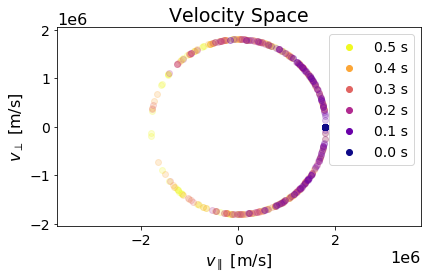

In [11]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', 
              title = 'Velocity Space', fontsize = 16, filename = 'Circle_snaps.pdf')

In [12]:
iters, imean, ivar, i_pitch_mean, i_pitch_var, v_init = test.pitchIter(17000, 100, 1E-3, 
                                                                       0, 500, 10, 5, 'MEM', silent = True)